# pympp

> A toolkit for multimodal process prediction with neural networks in python.

## Install

```sh
pip install pympp
```

## How to use

**Process Prediction**


In [6]:
from pympp.process import *
from pympp.prediction.predict import *

In [8]:
col='activity'
o=PPObj(log,procs=Categorify(),cat_names=col,y_names=col,splits=split_traces(log))
o.show()

#traces: 12616 #events: 249149


,activity
trace_id,
203940,2
203940,12
203940,9


epoch,train_loss,valid_loss,accuracy_targ0,time
0,2.897732,2.902493,0.804733,00:20
1,2.894417,2.889455,0.817099,00:19
2,2.899381,2.889609,0.817048,00:21
3,2.889103,2.889244,0.817354,00:20
4,2.886401,2.889135,0.817455,00:21


Better model found at epoch 0 with valid_loss value: 2.9024930000305176.
Better model found at epoch 1 with valid_loss value: 2.8894548416137695.
Better model found at epoch 3 with valid_loss value: 2.8892438411712646.
Better model found at epoch 4 with valid_loss value: 2.8891353607177734.
No improvement since epoch 1: early stopping


Better model found at epoch 0 with valid_loss value: 0.8141778111457825.


0.8141778111457825

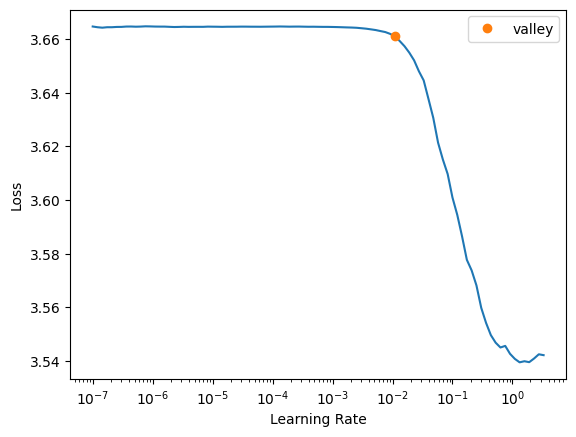

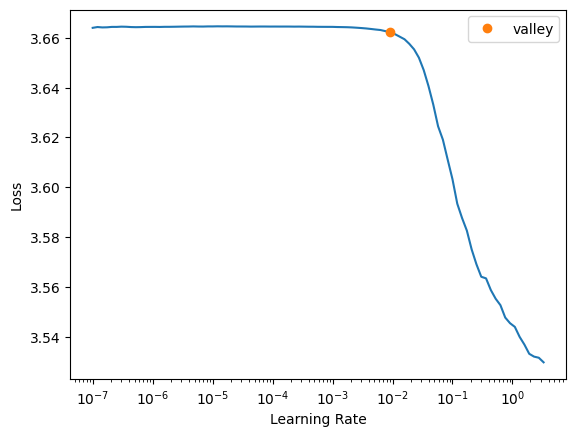

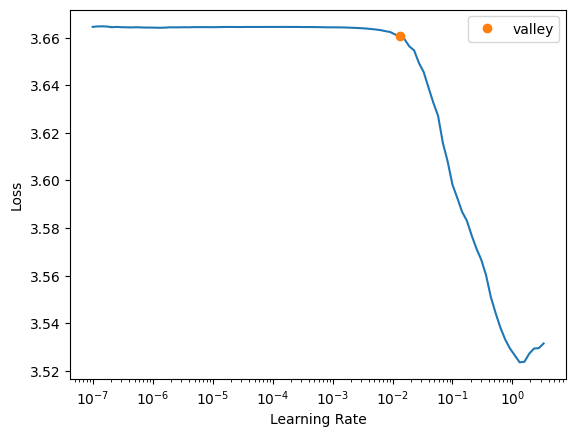

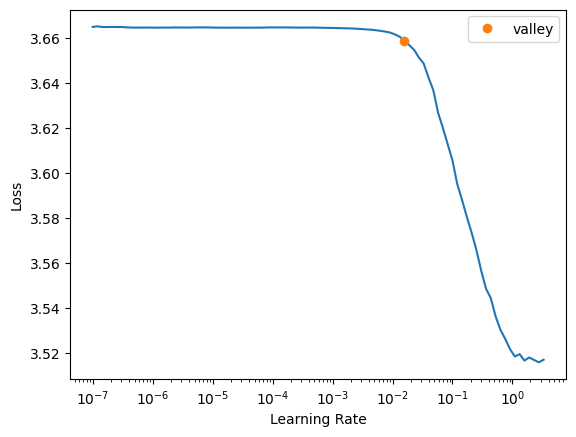

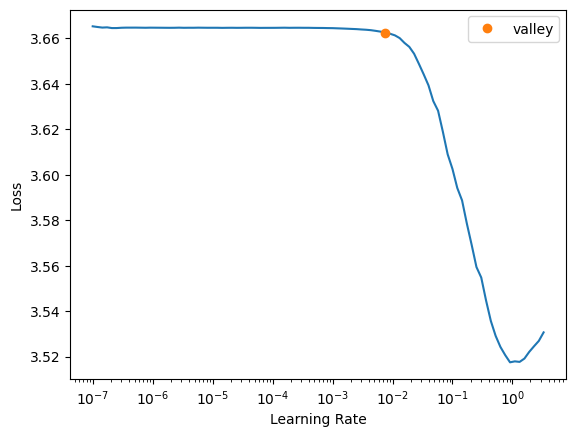

In [11]:
dls=o.get_dls()
m=RNNwEmbedding(o)
train_validate(dls,m,epoch=5,metrics=accuracy_targ0,loss=cross_entropy_targ0)

**Anomaly Detection**

In [47]:
from pympp.anomaly.detect import *
from fastai.basics import *
from sklearn.metrics import f1_score

In [48]:
log = import_log('./data/logs/csv/dapnn_ds/PDC2020_training/pdc_2020_0101100.csv.gz')
log.head()

,activity,event_id
trace_id,,
trace 1,###start###,0
trace 1,t31,1
trace 1,t41,2
trace 1,t26,3
trace 1,t36,4


In [49]:
o,dls,categorify = training_dl(log)

epoch,train_loss,valid_loss,accuracy_targ0,time
0,2.368546,2.242282,0.343582,00:05
1,1.432667,1.315172,0.498780,00:05
2,1.152515,1.150146,0.502684,00:05
3,1.127919,1.079701,0.489995,00:05
4,1.097728,1.061128,0.502684,00:05
5,1.075244,1.049403,0.524646,00:05
6,1.108218,1.054266,0.509029,00:05
7,1.084068,1.038007,0.508053,00:05
8,1.043888,1.044979,0.508053,00:05
9,1.066492,1.040300,0.520742,00:05


Better model found at epoch 0 with valid_loss value: 2.2422821521759033.
Better model found at epoch 1 with valid_loss value: 1.3151723146438599.
Better model found at epoch 2 with valid_loss value: 1.1501457691192627.
Better model found at epoch 3 with valid_loss value: 1.0797010660171509.
Better model found at epoch 4 with valid_loss value: 1.0611282587051392.
Better model found at epoch 5 with valid_loss value: 1.0494030714035034.
Better model found at epoch 7 with valid_loss value: 1.038007378578186.
Better model found at epoch 10 with valid_loss value: 1.017255187034607.
Better model found at epoch 13 with valid_loss value: 1.014860987663269.
Better model found at epoch 15 with valid_loss value: 1.0078041553497314.
Better model found at epoch 18 with valid_loss value: 1.0048224925994873.
No improvement since epoch 15: early stopping


Better model found at epoch 0 with valid_loss value: 0.51848304271698.


(#2) [1.0248966217041016,0.51848304271698]

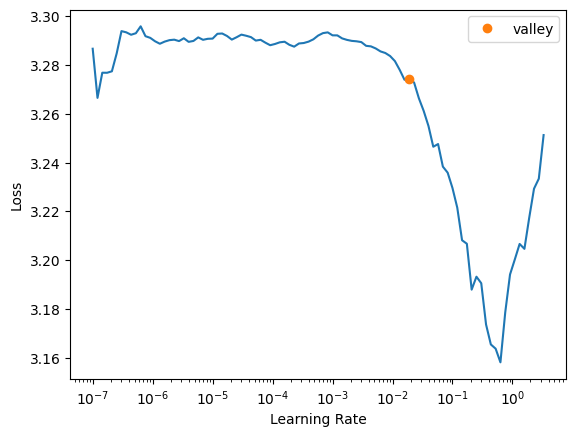

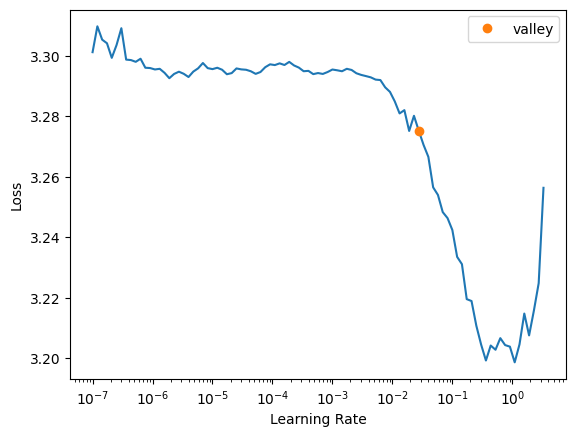

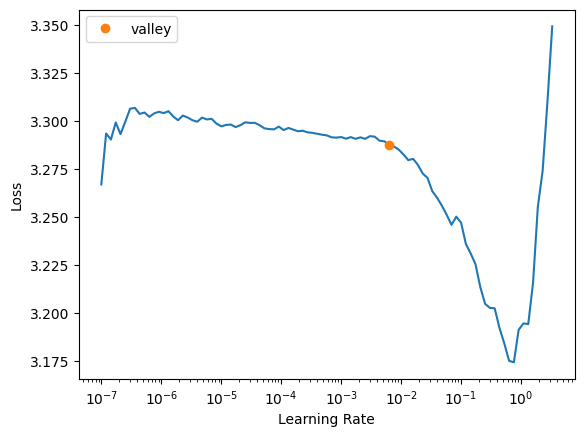

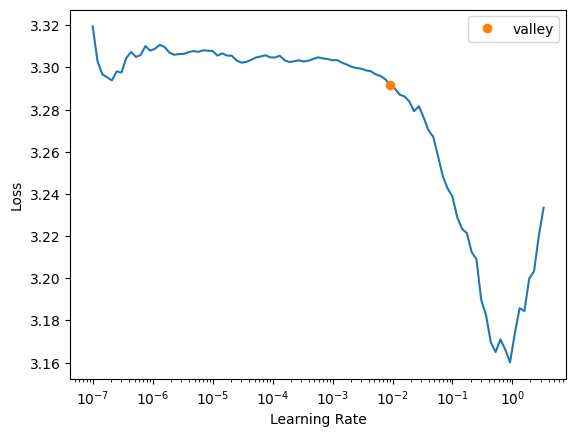

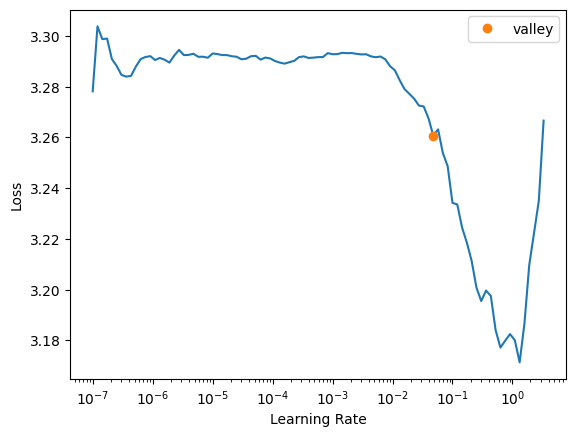

In [50]:
m=ControlFlowModel(o)
train_validate(dls,m,epoch=25,metrics=accuracy_targ0,loss=cross_entropy_targ0)

In [51]:
test_log = import_log_pdc('../data/logs/csv/dapnn_ds/PDC2020_ground_truth/pdc_2020_0101100.csv.gz')
test_log.head()

,activity,case:pdc:costs,normal,event_id
trace_id,,,,
trace 1,###start###,0.0,True,0
trace 1,t21,0.0,True,1
trace 1,t32,0.0,True,2
trace 1,t26,0.0,True,3
trace 1,t41,0.0,True,4


In [52]:
o = process_test(test_log,categorify)
wds,idx=windows_fast(o.xs, o.event_ids)
res=(m(LongTensor(wds).cuda()))
anomaly_score = calc_anomaly_score(res,o,idx)
y_pred, y_true = get_anomalies(anomaly_score,o,idx)
f1_score(y_true, y_pred)

0.8430066603235015

Build with nbdev and fastai.